# Demo - Bayesian Neural Network Classification

In [7]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Iris Data

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
Y = iris.target 

In [5]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

## 2. Define Model

In [8]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)

In [9]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

## 3. Train Model

In [10]:
kl_weight = 0.1

In [ ]:
for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([150, 3])
torch.Size([1

KeyboardInterrupt: 

## 4. Test Model

In [10]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

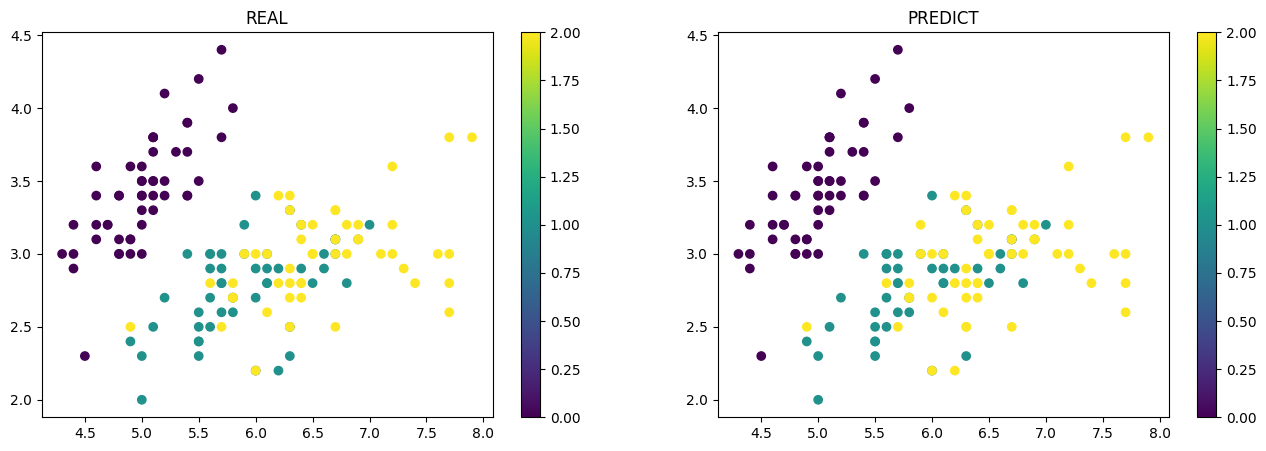

In [11]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

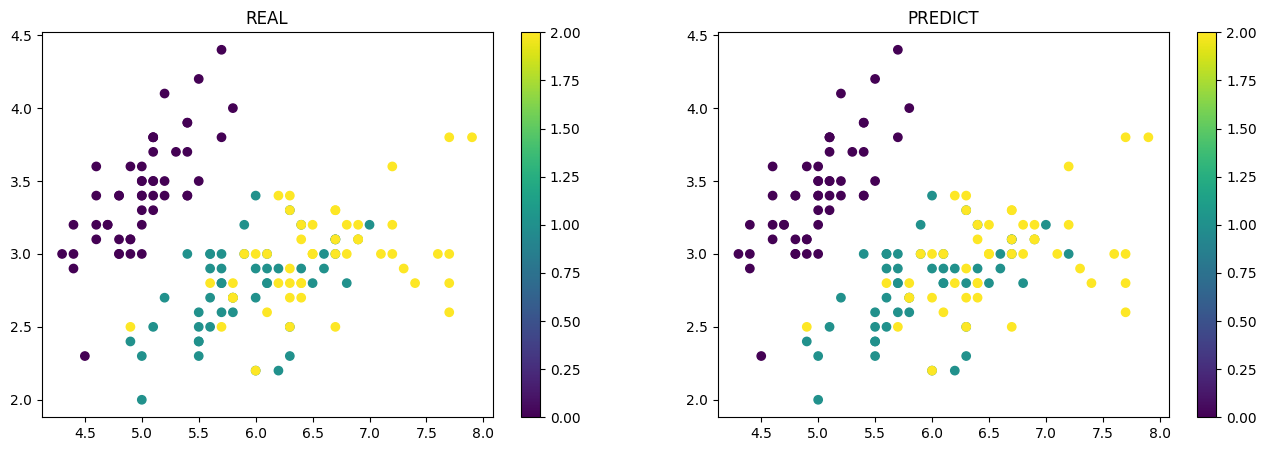

In [12]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)